# OBJETIVO
 Determinar entre los modelos M1 y M2,cual es que entrega resultado mas eficiente, para luego entregarlo a  comitente,y que realice sus pruebas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
# LA FUENTE DE ESTE DATAFRAME ES KAGLE, SE CARGO EL .CSV EN REPOSITORIO DE GITHUB.
url = "https://github.com/Martinerramuspe/02-DATA_SCIENCIE/blob/main/00-CODER_HOUSE/00-DATASETS/student-mat.csv?raw=true"
df = pd.read_csv(url)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [30]:
df.corr()["G1"]

<ipython-input-30-d74f358c6888>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["G1"]


age          -0.064081
Medu          0.205341
Fedu          0.190270
traveltime   -0.093040
studytime     0.160612
failures     -0.354718
famrel        0.022168
freetime      0.012613
goout        -0.149104
Dalc         -0.094159
Walc         -0.126179
health       -0.073172
absences     -0.031003
G1            1.000000
G2            0.852118
G3            0.801468
Name: G1, dtype: float64

In [31]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

<Axes: >

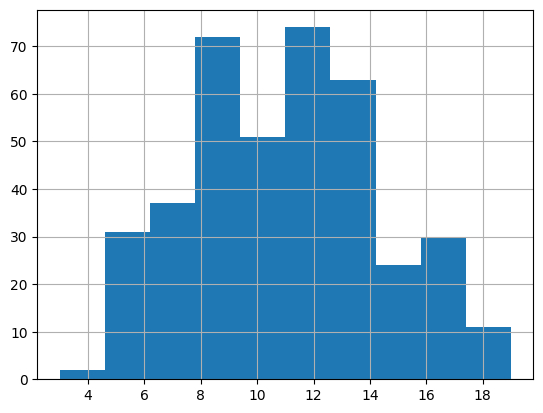

In [32]:
import matplotlib.pyplot as plt
df["G1"].hist()

# MODELO: M1
* Usamos dataframe **df **sin hacerle limpieza.
* Aplicamos la herramienta **split**, para crear los Train_set y Test_set.
* Creamos modelo de regresion m1 con los datos anteriores
* Aplicamos la herramienta **Cross**, con una particion de 3 set, obteniendo como resultado :
[-0.04193203, -0.00484517, -0.08706968], 0.03283733601178129.

In [72]:
X= df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']]
y= df['G1']

In [73]:
import numpy as np

In [74]:
X=pd.get_dummies(X,drop_first=True)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y)

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [78]:
m1= LinearRegression()

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
cross_val_score(m1,X_train1,y_train1,cv=3)

array([ 0.0965604 ,  0.09106213, -0.08911053])

In [62]:
cross_val_score(m1,X_train1,y_train1,cv=3).mean()

0.03283733601178129

# MODELO: M2
* Usamos dataframe **df2 **, donde se retiraron los datos anomalos de cada una de las variables.
* Aplicamos la herramienta **split**, para crear los Train_set y Test_set.
* Creamos modelo de regresion m2 con los datos anteriores
* Aplicamos la herramienta **Cross**, con una particion de 3 set, obteniendo como resultado :
[-0.27809488, -0.22267349,  0.12049659], -0.1267572579101313.

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1
# Identificar valores atípicos
outliers_mask = (df < Q1 - 1.5 * IQR) | (df > Q3 + 1.5 * IQR)
# Retirar valores atípicos
df2 = df[~outliers_mask.any(axis=1)]

<ipython-input-16-e91917888399>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-16-e91917888399>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-16-e91917888399>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_mask = (df < Q1 - 1.5 * IQR) | (df > Q3 + 1.5 * IQR)


In [17]:
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,MS,F,18,R,GT3,T,2,2,at_home,other,...,5,3,3,1,3,4,2,10,9,10
386,MS,F,18,R,GT3,T,4,4,teacher,at_home,...,4,4,3,2,2,5,7,6,5,6
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [18]:
X= df2[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']]
y= df2['G1']

In [19]:
import numpy as np

In [20]:
X=pd.get_dummies(X,drop_first=True)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [24]:
m2= LinearRegression()

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cross_val_score(m2,X_train2,y_train2,cv=3)

array([-0.27809488, -0.22267349,  0.12049659])

In [27]:
cross_val_score(m2,X_train2,y_train2,cv=3).mean()

-0.1267572579101313

# MODELO GANADOR : M1
* Entregamos el modelo al comitente para que realices sus prueba con un set de datos ( Test_X y Test_y).
* Con los resultados anterires obtenido, sabemos que el modelo es muy ineficiente, pero relativamente es el mejor.
* El resultado obtenido por el comitente:
  * 0.08151500221985564 ( mejor que lo que obtuvimos nosotros en M1).

In [79]:
m1.fit(X_train1,y_train1) # Aprendizaje

LinearRegression()

In [80]:
ypred1=m1.predict(X_test1) # Prediccion

In [83]:
from sklearn.metrics import r2_score

In [84]:
r2_score(y_test1,ypred1)

0.08151500221985564